# Cardio Good Fitness Case Study - Descriptive Statistics
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

### The team identifies the following customer variables to study: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; 
  - and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

### Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

# Load the necessary packages

In [55]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Load the Cardio Dataset

In [5]:
data=pd.read_csv('C:\\Users\\Dell\\Downloads\CardioGoodFitness-1.csv')

# Q1: Show few data from begin and end 

In [7]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [8]:
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


# Q2: Give a statistical description of all varibales available in the datasets.

In [9]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
data.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


# Q3: Which product of treadmill has been frequently used by male 

In [11]:
pd.crosstab(data['Product'],data['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [ ]:
#Notes
#The TM798 is frequently used by Males compared to Females

# Q4: How many objects are there in the datasets

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


In [ ]:
#Notes
#There are 9 objects in the dataset

# Q5: What your intution says about the numeric attributes such as Age, Income, Miles, and usage are normally distributed? Justified through required graphic

In [14]:
pd.pivot_table(data, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

Age


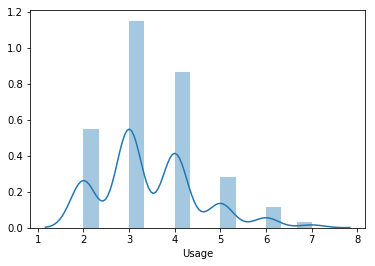

In [63]:
print("Age")
sns.distplot(data['Usage'])

Text(0.5,1,'Usage')

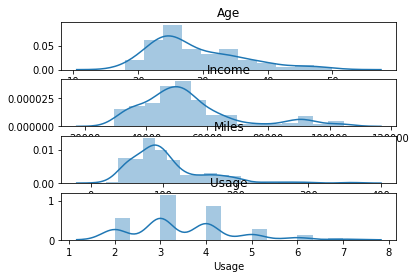

In [76]:
plt.subplot(4,1,1)
sns.distplot(data['Age'])
plt.title("Age")

plt.subplot(4,1,2)
sns.distplot(data['Income'])
plt.title("Income")

plt.subplot(4,1,3)
sns.distplot(data['Miles'])
plt.title("Miles")

plt.subplot(4,1,4)
sns.distplot(data['Usage'])
plt.title("Usage")

In [ ]:
#Notes
#Age is normally distributed
#Income is normally distributed
#Miles is normally distributed
#Usage is not normally distributed

# Q6: Find the outlier if any exists in the variable Age. Hint: calcualte the IQR and use to filter the ourlier 

In [60]:
def dist_box_violin(data):
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    sns.violinplot(data,ax=axes[2],showmeans=True)
    
    IQR = stats.iqr(data, interpolation = 'midpoint')
    

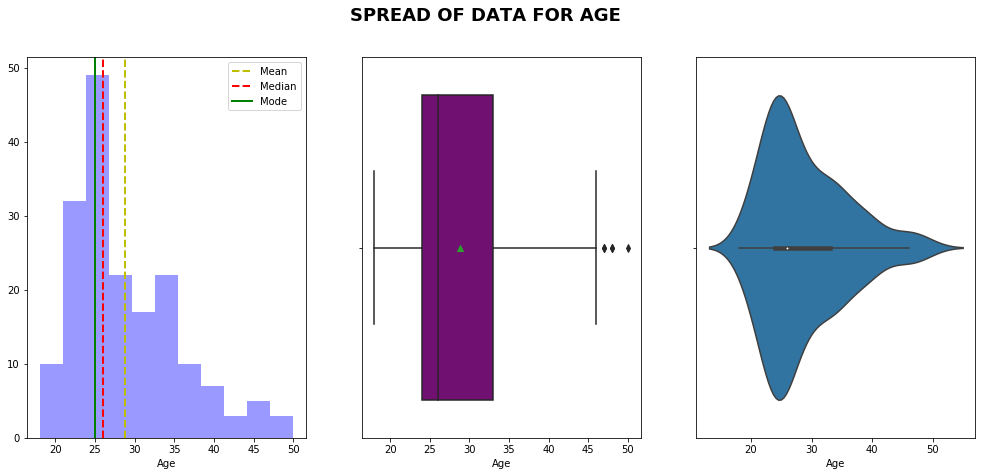

In [61]:
dist_box_violin(dffitness.Age)

In [ ]:
#Notes
#Age is skewed towards right.
#Customers buying treadmill are younger and average age of customer is 28 , median is 26 and mode is 25
#Customers buying treadmill after age of 40 and before 20 are very less.
#Outliers are present in the form of ages over 40 and ages below 20

# Q7: Which plot is required to display five statistics of the variables Income with respect to Age. Display the graphics

In [ ]:
#Notes
# We use box-plot to display five statistics of the variables Income with respect to Age

# Q8: How do you compare among the product of treadmill? or Which product is frequently used by gender-wise. Show your result through plot.

In [40]:
pd.pivot_table(data, index=['Product'],columns=[ 'Gender'], aggfunc=len)

Age      Education      Fitness      Income      MaritalStatus  \
Gender  Female Male    Female Male  Female Male Female Male        Female   
Product                                                                     
TM195       40   40        40   40      40   40     40   40            40   
TM498       29   31        29   31      29   31     29   31            29   
TM798        7   33         7   33       7   33      7   33             7   

              Miles       Usage       
Gender  Male Female Male Female Male  
Product                               
TM195     40     40   40     40   40  
TM498     31     29   31     29   31  
TM798     33      7   33      7   33

In [50]:
def bar_perc(plot, feature):
    
    total = len(feature) 
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()          
        plot.annotate(percentage, (x, y), size = 12) 

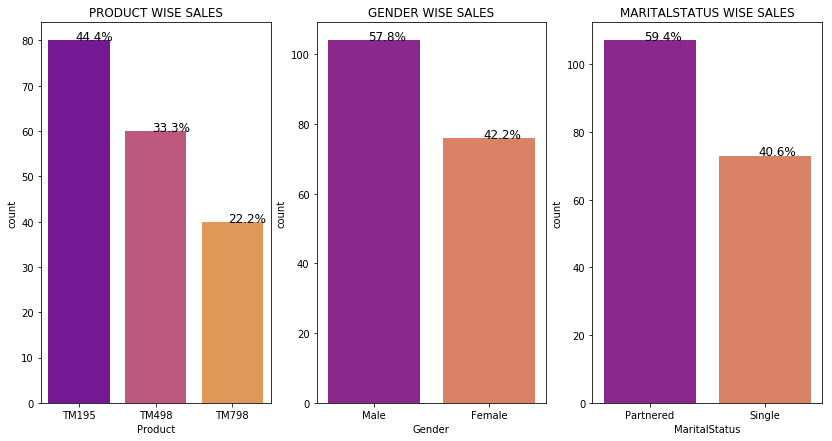

In [51]:
dffitness=data.copy()
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
list_col=['Product','Gender','MaritalStatus']
j=0
for i in range(len(list_col)):
    order = dffitness[list_col[i]].value_counts(ascending=False).index 
    axis=sns.countplot(x=list_col[i], data=dffitness , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() + ' WISE SALES')
    bar_perc(axes1[i],dffitness[list_col[i]])

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


Text(0.5,1,'PRODUCT BY GENDER')

<Figure size 720x720 with 0 Axes>

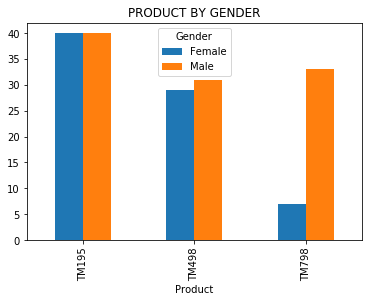

In [52]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(dffitness['Product'],dffitness['Gender'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')

plt.title("PRODUCT BY GENDER")

In [ ]:
#Notes
#TM789 is preferred by Males over Females
#TM195 is equally preferred by both Males and Females
#TM498 is slightly more preferred by Males than Females

# Q9: Is maritial status affect the utiliation of the product of the treadmill? If so justify your results through the index matrix form

In [44]:
pd.pivot_table(data, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


Text(0.5,1,'PRODUCT BY MARTIAL STATUS')

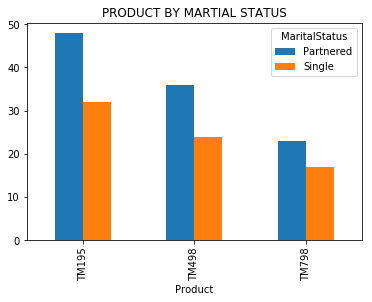

In [53]:
prd_mar_status=pd.crosstab(dffitness['Product'],dffitness['MaritalStatus'] )
print(prd_mar_status)
prd_mar_status.plot(kind='bar')
plt.title("PRODUCT BY MARTIAL STATUS")

In [ ]:
#Notes
#Yes, marital status does affect utilization of the product
#Partnered couples have used all 3 products more, compared to single people

# Q10: How do you explain the relation between the numeric attributes? Which variables are correlated and quatify the relation? 

In [29]:
corr=data.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


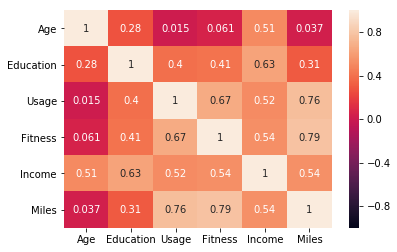

In [30]:
sns.heatmap(corr,annot=True, vmin=-1,vmax=1)

In [54]:
#Notes
#Age and Income has some in significant correlation
#Education and Income has very little correlation
#There is some corelation between Usage and Income
#Fitness and miles are corelated
#TM798 model is correlated to Education, Usage,Fitness, Income and Miles.
#Miles and usage are positively correlated

# Q11: Develope a model which can predict distance in miles with respect to fitness and usage. 

In [25]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
y=data['Miles']
x=data[['Fitness','Usage']]

#Train
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Predictions
print(regr.coef_)
print(regr.intercept_)

[ 27.20649954  20.21486334]
-56.7428817846
